#      Machine Learning Framework for *Spatial Daylight Autonomy*

-  One of Many Routes of Understanding an assessment of any Data is by Performing Exploratory Data analysis  , Predictions Through Machine Learning Algorithms & Sensitivity Analysis   , here in this study we will apply these tasks in order to get a better understanding of our Provided Data Generaly and the *Spatial Daylight Autonomy * Data Specifically 

By Madjid Erroukrma , Contact : madjidmain@gmail.com 

#### Study GuideLine  : 
   - Checking and Cleaning Data Format
   - Exploratory Data Analysis (Getting to Know out Data Throught Visualizations and code ) 
   - Preparing & Applying Machine Learning Algorithms
   - Evaluating Model
   - Sensitivity Analysis


##### importing Required Libraries : 


In [45]:
# 1 - Data Libraries : 

import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# 2 - Visualizations Libraries : 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# 3 - Machine Learning Libraries :

from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# 4 - Sensitivity Analysis Libraries : 

import eli5
from eli5.sklearn import PermutationImportance
import shap 
from pdpbox import pdp, get_dataset, info_plots


### Checking and Cleaning Data Format

In [46]:
#Import Data and View it : 
Data = pd.read_excel("E:\\Chrome Download\\Book1.xlsx")
Data.head()

,Unnamed: 0,Louvers Material Reflection,Glass Material Transmittance,shading type,ENT Lightshelf Width,Louvers offset from the window,EXT Louvers ORIENTATION ANGLE,sDA,ASE,sDA-ASE,LEED
0,NaN,0.7,0.47,0,0.3,0.30,30,83.67,10.8,72.87,1
1,NaN,0.7,0.65,1,0.3,0.26,0,95.17,2.5,92.67,0
2,NaN,0.7,0.47,1,0.3,0.28,0,83.67,2.5,81.17,0
3,NaN,0.7,0.65,0,0.3,0.01,30,95.17,10.8,84.37,1
4,NaN,0.7,0.65,1,0.2,0.21,30,95.17,8.7,86.47,0


In [47]:
# Drop The Column Unnamed 0  : 
Data.drop(columns ="Unnamed: 0",inplace=True,axis=1)
Data.head()

,Louvers Material Reflection,Glass Material Transmittance,shading type,ENT Lightshelf Width,Louvers offset from the window,EXT Louvers ORIENTATION ANGLE,sDA,ASE,sDA-ASE,LEED
0,0.7,0.47,0,0.3,0.30,30,83.67,10.8,72.87,1
1,0.7,0.65,1,0.3,0.26,0,95.17,2.5,92.67,0
2,0.7,0.47,1,0.3,0.28,0,83.67,2.5,81.17,0
3,0.7,0.65,0,0.3,0.01,30,95.17,10.8,84.37,1
4,0.7,0.65,1,0.2,0.21,30,95.17,8.7,86.47,0


In [48]:
#checking Data Shape : 
print("Data Shape :\n",Data.shape)
#Data has : 722 row and 10 columns

Data Shape :
 (722, 10)


In [49]:
# Checking Data Column Types
print("Data Columns Format : \n",Data.dtypes)

Data Columns Format : 
 Louvers Material Reflection       float64
Glass Material Transmittance      float64
shading type                        int64
ENT Lightshelf Width              float64
Louvers offset from the window    float64
EXT Louvers ORIENTATION ANGLE       int64
sDA                               float64
ASE                               float64
sDA-ASE                           float64
LEED                                int64
dtype: object


In [50]:
# Checking for Any Missing Value : 
print("Number of Missing Values : \n",Data.isna().sum())

Number of Missing Values : 
 Louvers Material Reflection       0
Glass Material Transmittance      0
shading type                      0
ENT Lightshelf Width              0
Louvers offset from the window    0
EXT Louvers ORIENTATION ANGLE     0
sDA                               0
ASE                               0
sDA-ASE                           0
LEED                              0
dtype: int64


> Now we made sure that our Data is Clean 

### Exploratory Data Analysis

Checking if our Data Need Scaling

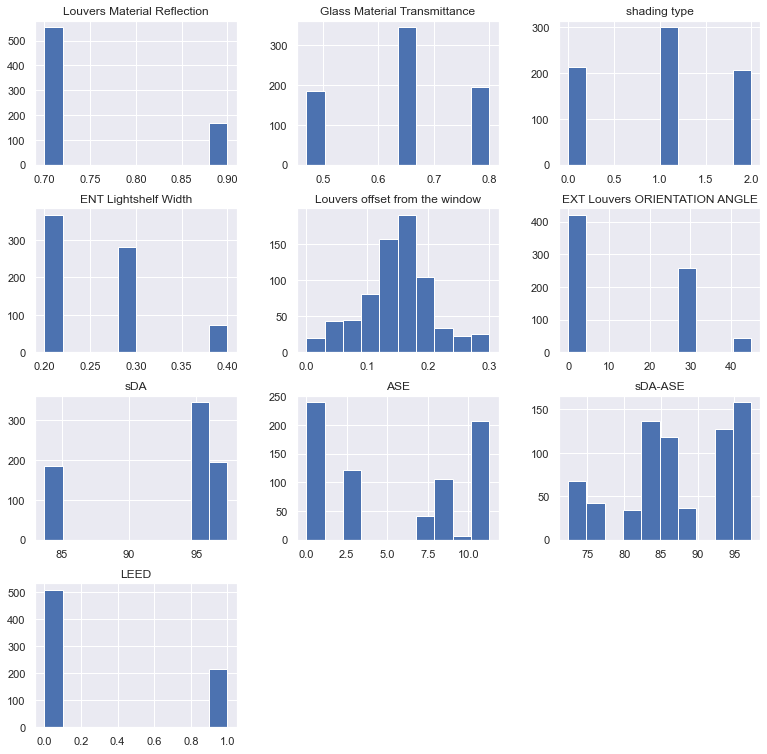

In [51]:
#plot all the data with histograms: 
Data.hist(figsize=(13,13))
plt.show()

Checking Correlation with our Target Column 

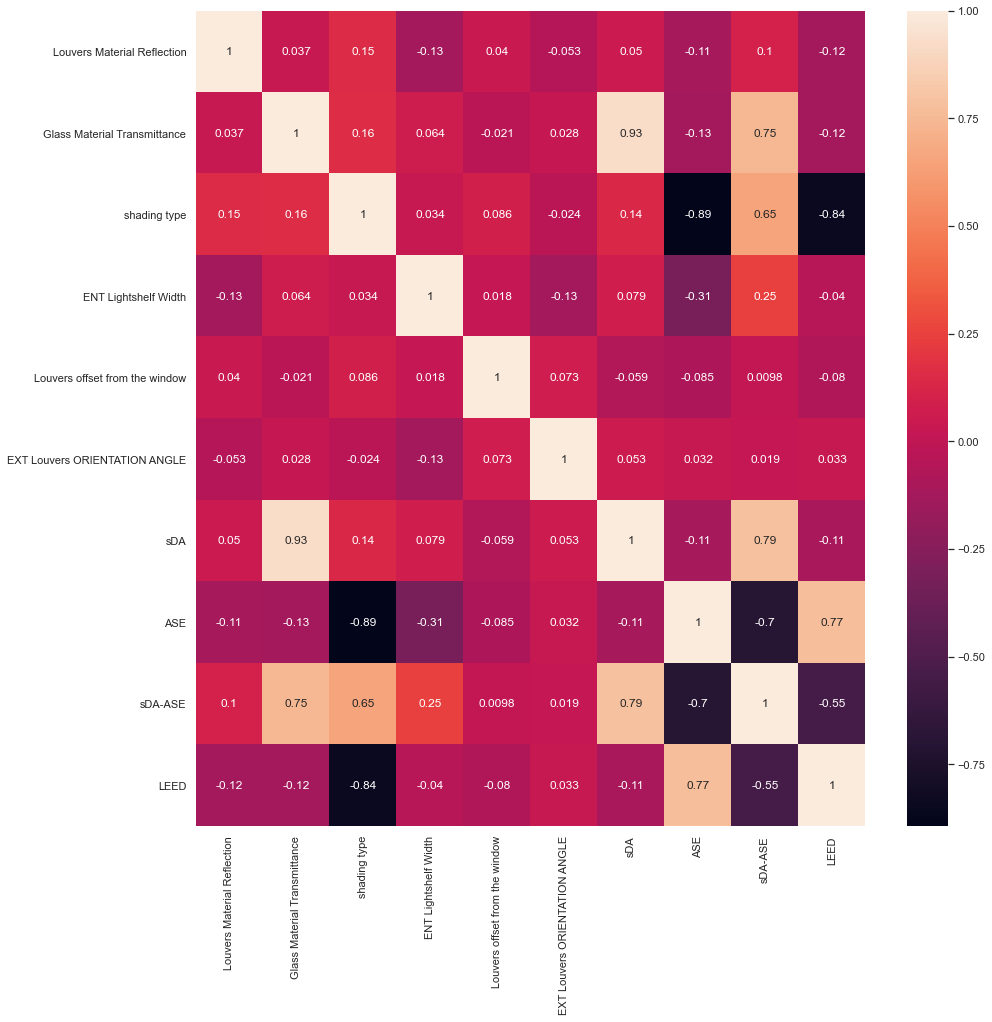

In [52]:
# correlation heatmap Plotting 
plt.figure(figsize=(15,15))
sns.heatmap(Data.corr(),annot=True)
plt.show()

### Preparing & Applying Machine Learning Algorithms

In [53]:
#Splitting our Data into Features and Target : 
y = Data["sDA"]
Data.drop(["sDA"],inplace=True,axis=1)
X = Data

In [54]:
#Splitting our Data into Train & Test Data  : 
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42)

##### XGBOOST Algorithm

In [55]:
# Making & Tuning our Algorithm Parameter : 
XGBparams = { 
"learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30,0.40,0.50],
"max_depth" : [3,4,5,6,8,10,12,15],
"min_child_weight" :  [1,3,4,5,6,7,8,9],
"colsample_bytree" : [0.3,0.4,0.5,0.6,0.7,0.8,.09],
}
xgb_model = xgboost.XGBRegressor()
XGBrandom_search = RandomizedSearchCV(xgb_model,
                                   param_distributions=XGBparams
                                   ,n_iter=6,n_jobs=-1
                                   ,verbose=3,
                                  cv = 5,
                                  scoring = "roc_auc")
XGBrandom_search.fit(X_train,y_train)
XGBrandom_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.09,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=15, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
#Training Model and Predicting  : 
XGBMODEL = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.09,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=7,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
XGBMODEL.fit(X_train,y_train)
y_pred = XGBMODEL.predict(X_valid)

##### Random Forest Algorithm

In [57]:
# Making & Tuning our Algorithm Parameter : 
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(test_y, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred4 = y_valid, regr_rf.predict(X_valid)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)

The best hyper-parameters for Random Forests are:  {'max_depth': 5, 'n_estimators': 10}


In [58]:
#Training Model and Predicting  :
regr_rf = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=10)
regr_rf.fit(X_train, y_train)
y_pred2 = regr_rf.predict(X_valid)  

### Evaluation Step 

##### Evaluating Both Algorithms using Accuracy Metric 

In [59]:
print("XGBOOST Algorithm Model Score : ", XGBMODEL.score(X_train,y_train)*100)
print("Random Forest Algorithm Score : ", regr_rf.score(X_train,y_train)*100)

XGBOOST Algorithm Model Score :  99.93383844660912
Random Forest Algorithm Score :  100.0


##### Evaluating Both Algorithms using Mean Absolute error 

In [60]:
print("XGBOOST Algorithm Model Score : ",mean_absolute_error(y_valid,y_pred))
print("Random Forest Algorithm Model Score : ",mean_absolute_error(y_valid,y_pred2))

XGBOOST Algorithm Model Score :  0.10129699875636608
Random Forest Algorithm Model Score :  4.0591225899223405e-14


### Sensitivity Analysis

In [61]:
# Checking The importance of Data Through Permutaion Importance (Xgboost Algorithm) : 
perm = PermutationImportance(regr_rf, random_state=1).fit(X_valid,y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.8664 ± 0.0952,sDA-ASE
0.2606 ± 0.0258,Glass Material Transmittance
0 ± 0.0000,LEED
0 ± 0.0000,ASE
0 ± 0.0000,EXT Louvers ORIENTATION ANGLE
0 ± 0.0000,Louvers offset from the window
0 ± 0.0000,ENT Lightshelf Width
0 ± 0.0000,shading type
0 ± 0.0000,Louvers Material Reflection


In [62]:
# Checking The importance of Data Through Permutaion Importance (Random Forest Algorithm) :
perm = PermutationImportance(XGBMODEL, random_state=1).fit(X_valid,y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
1.0311 ± 0.1165,sDA-ASE
0.1020 ± 0.0129,Glass Material Transmittance
0.0193 ± 0.0025,ASE
0.0003 ± 0.0000,shading type
0.0002 ± 0.0001,LEED
0.0001 ± 0.0001,ENT Lightshelf Width
0.0001 ± 0.0001,Louvers offset from the window
0.0000 ± 0.0000,EXT Louvers ORIENTATION ANGLE
-0.0000 ± 0.0000,Louvers Material Reflection


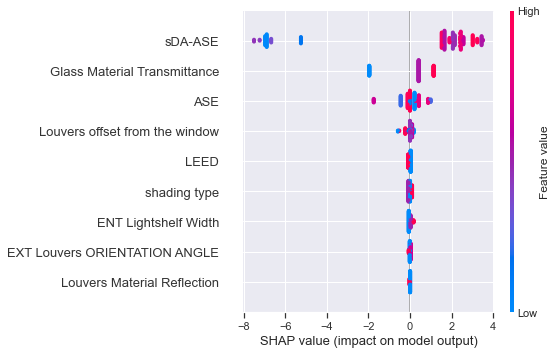

In [63]:
# Checking The importance of Data Through SHAP VALUES & SHAP Summary : 
explainer = shap.TreeExplainer(XGBMODEL)
shap_values = explainer.shap_values(X_valid)
shap.summary_plot(shap_values,X_valid)

<Figure size 1440x1440 with 0 Axes>

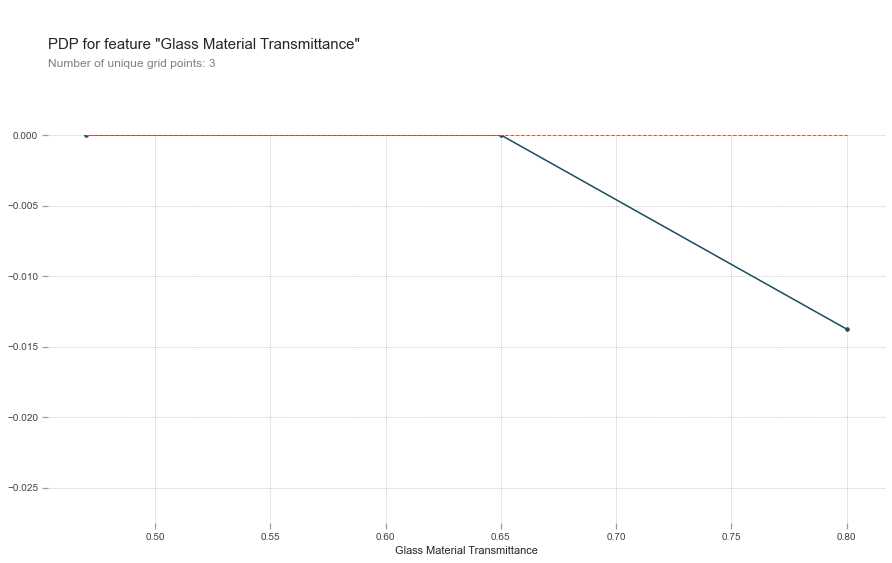

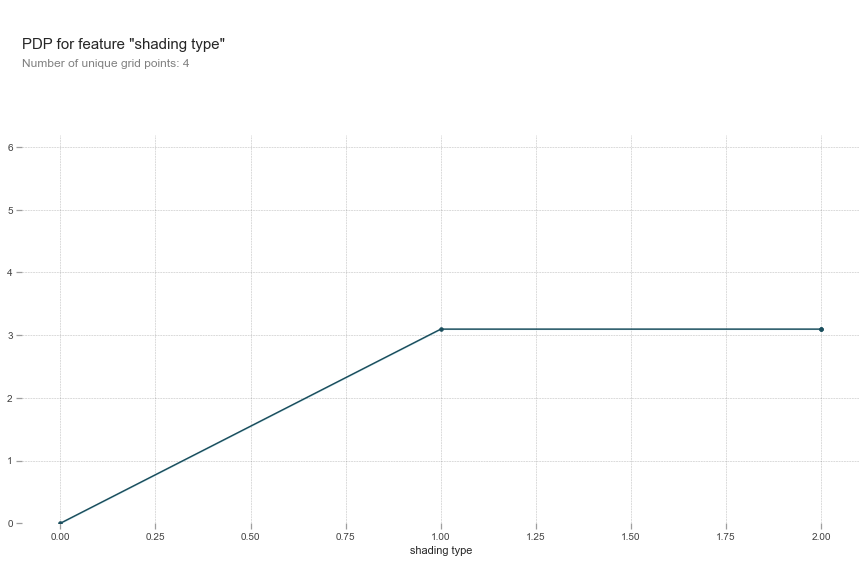

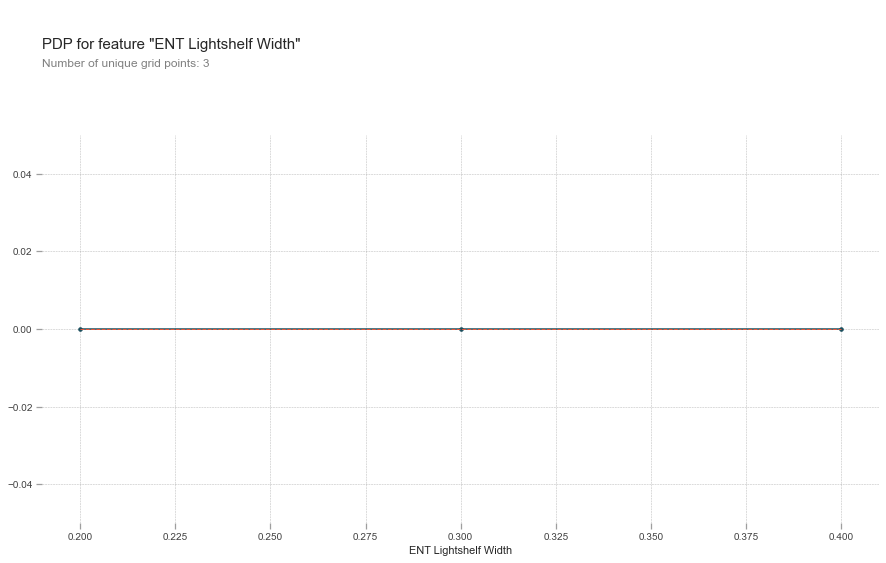

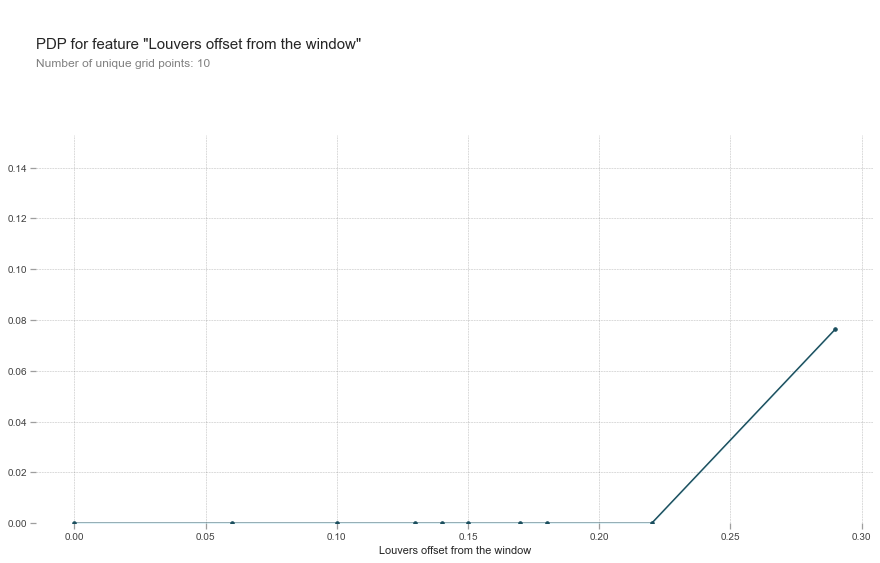

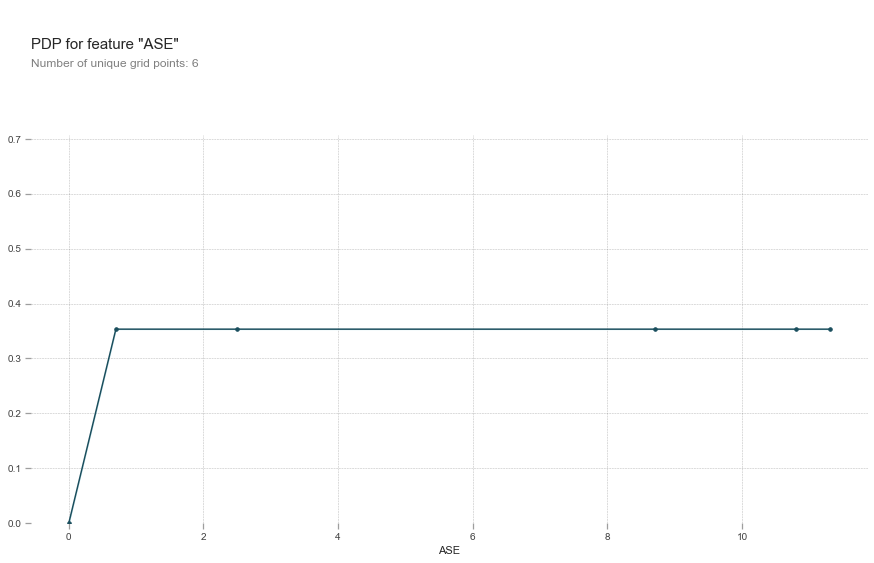

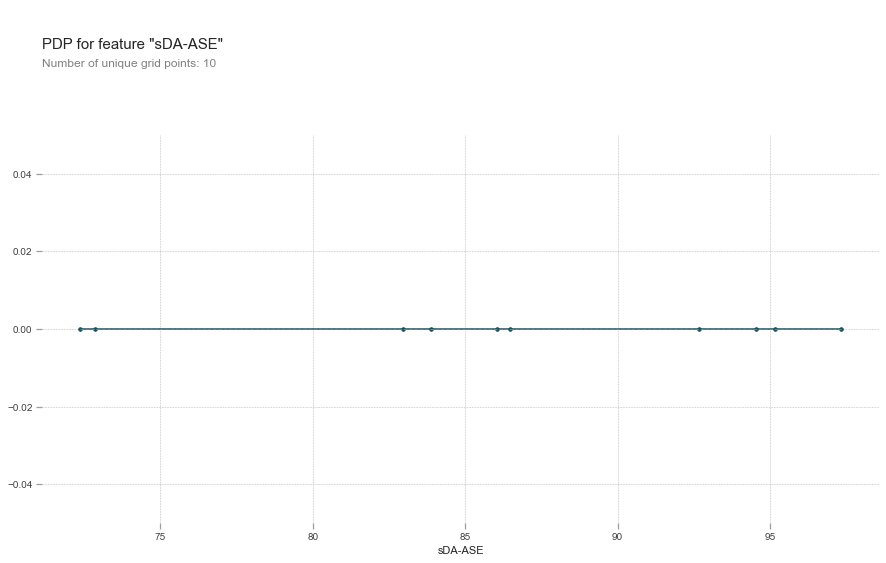

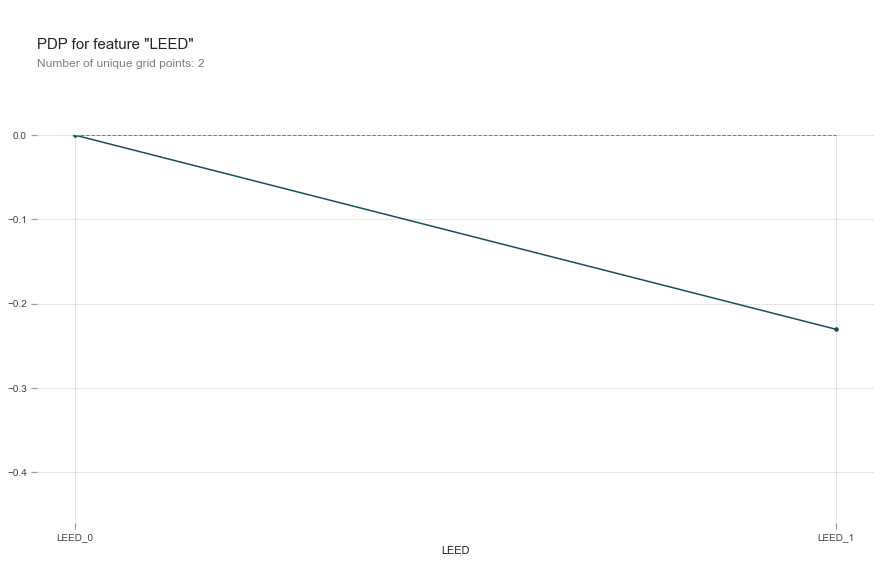

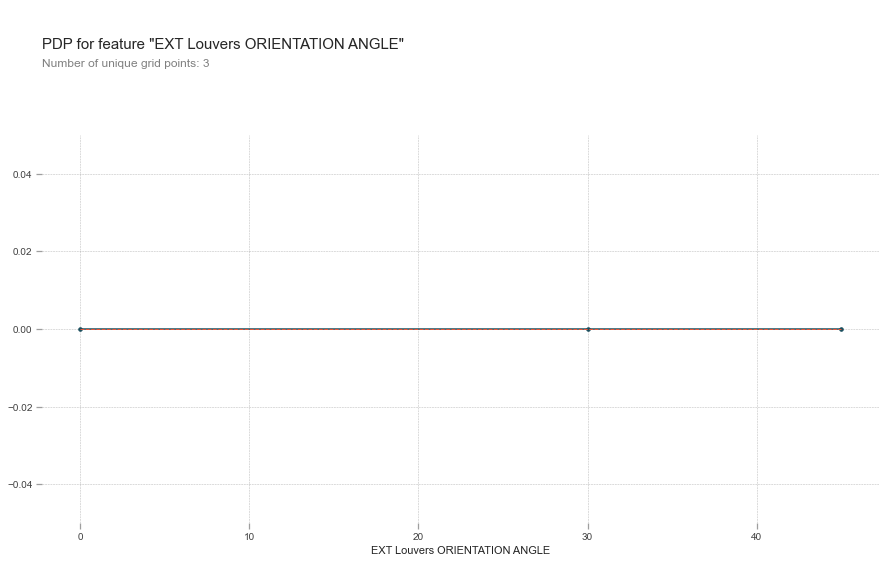

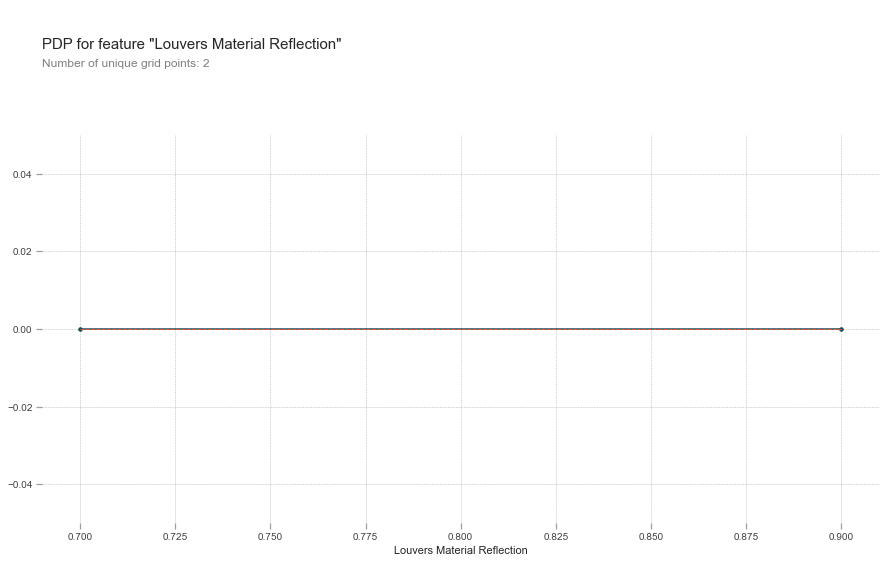

In [65]:
#Checking How each Column Impacted Prediction through Partial Plots  : 
features= ["Glass Material Transmittance","shading type","ENT Lightshelf Width","Louvers offset from the window","ASE","sDA-ASE","LEED","EXT Louvers ORIENTATION ANGLE","Louvers Material Reflection"]
plt.figure(figsize=(20,20))
for n,featureN in enumerate(features) : 
    pdp_dist = pdp.pdp_isolate(model=XGBMODEL, dataset=X_valid, model_features=features, feature=featureN)
    pdp.pdp_plot(pdp_dist, featureN)
    pdp.plt.show()
  